# Lab6

## Align reads to human genome

### Terminal code:
bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 \ -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq

**_We used bowtie2 database containing the human genome as the database and the illumina reads as the input reads. The unaligned.fastq will contain the reads that could not align, so normally that should be anything that isn't from a human genome, so the unaligned.fastq file should contain reads that only belong to the S. oneidensis genome.
So the unaligned fastq file contains the filtered reads._**

**_In total, 96335 reads aligned, which is 8.57% of all the reads._**

### output:
1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate

------------------------------------

## Align reads to the S.oneidensis genome

### Terminal code:
bowtie2 -p 4 --very-fast --no-unal -x/data/lab6/shewanella_oneidensis_mr-1 \ -U unaligned.fastq -S output.sam --un unaligned2.fastq

**_Now the unaligned2.fastq file should contain all the reads that aligned neither to the human genome nor to the S. oneidensis genome. 29.13% of my genomic library did not align to the reference genome._**

### output:
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate

------------------------------------

## Using the sensitive paramater

### Terminal code:
bowtie2 -p 4 --very-sensitive --no-unal -x/data/lab6/shewanella_oneidensis_mr-1 \ -U Lab6/unaligned.fastq -S Lab6/output2.sam --un unaligned4.fastq

**_Using the very sensitive parameter slightly increases the alignment rate to 71.01%._**

### output:
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    298112 (28.99%) aligned 0 times
    688180 (66.92%) aligned exactly 1 time
    42087 (4.09%) aligned >1 times
71.01% overall alignment rate

------------------------------------

## Generating a coverage plot

**_I renamed the output2.sam file as "my__alignment.sam". 
This file was lease converted to BAM, sorted, indexed. We used “depth” to generate a file containing the depth of coverage for every position in the reference genome._**

### Terminal code:

samtools view –b Lab6/alignment.sam > Lab6/alignment.bam

samtools view –F 4 Lab6/alignment.bam

samtools sort Lab6/alignment.bam > Lab6/my_alignment.sorted.bam

samtools index Lab6/alignment.sorted.bam

samtools depth Lab6/alignment.sorted.bam > Lab6/pileup4.tab

samtools tview Lab6/alignment.sorted.bam

------------------------------------


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Depth of coverage across all postions in the genome

In [4]:
table_names=["Name", "Position in Genome", "Depth of Coverage"]
Coverage_df = pd.read_csv('pileup4.tab', sep='\t', header=None, names=table_names)

#### Minimum Coverage

In [6]:
Coverage_df["Depth of Coverage"].min()

1

#### Mean Coverage

In [7]:
Coverage_df["Depth of Coverage"].mean()

37.03933156165406

#### Max Coverage

In [8]:
Coverage_df["Depth of Coverage"].max()

281

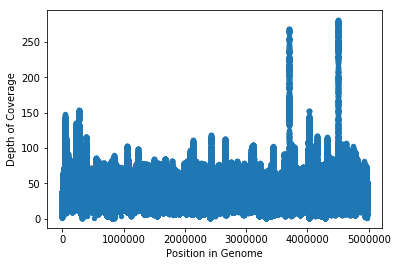

In [8]:
Coverage_df.plot.scatter(x="Position in Genome", y="Depth of Coverage")

### Distribution of coverage

(0, 120)

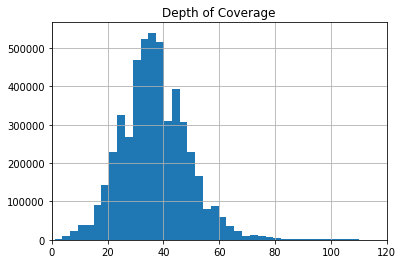

In [10]:
graph=Coverage_df.hist("Depth of Coverage", bins=100)
graph[0][0].set_xlim((0,120))

## Extra credit 1:

#### Terminal code:

samtools sort Lab6/output.sam > Lab6/output.bam

samtools index Lab6/output.bam 

samtools depth Lab6/output.bam > Lab6/pileup5.tab


In [20]:
table_names1=["Name", "Position in Genome", "Average Depth of Coverage"]
Avg_Coverage_df = pd.read_csv('pileup6.tab', sep='\t', header=None, names=table_names1)

In [7]:
Avg_Coverage_df.Name.unique()[np.arange(24)]

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
       'chrX', 'chrY'], dtype=object)

In [8]:
Chromosome_Table=Avg_Coverage_df.loc[Avg_Coverage_df['Name'].isin(Avg_Coverage_df.Name.unique()[np.arange(24)])]
#takes all chr1-22, X, Y rows

In [9]:
Chromosome_Table_grouped=Chromosome_Table.groupby("Name")
#groups rows by chromosome

#### The following is a list of the lenght of each chromosome

In [10]:
chromosome_length=[249250621, 243199373, 198022430, 191154276, 180915260,
                   171115067, 159138663, 146364022, 141213431, 135534747,
                   135006516, 133851895, 115169878, 107349540, 102531392,
                   90354753, 81195210, 78077248, 59128983, 63025520,
                   48129895, 51304566, 155270560, 59373566]
#chromosome 1-22, X, Y length from NCBI of HG19 length

In [21]:
average_depths=[]
for i in np.arange(24):
    average_depths+=[Chromosome_Table_grouped.get_group(Avg_Coverage_df.Name.unique()[np.arange(24)][i])["Average Depth of Coverage"].sum()/chromosome_length[i]]

In [14]:
EC1_table1=pd.DataFrame(data={"Chromosome": Avg_Coverage_df.Name.unique()[np.arange(24)], "Average Depth": average_depths})
EC1_table1

,Chromosome,Average Depth
0,chr1,0.009119
1,chr2,0.009904
2,chr3,0.009936
3,chr4,0.009911
4,chr5,0.009928
5,chr6,0.009896
6,chr7,0.009853
7,chr8,0.009859
8,chr9,0.008545
9,chr10,0.009768


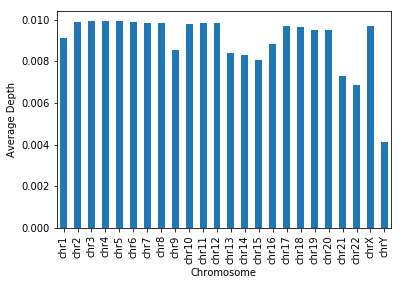

In [15]:
EC1_graph=EC1_table1.plot.bar("Chromosome", legend=False)
EC1_graph.set_xlabel("Chromosome")
EC1_graph.set_ylabel("Average Depth")
EC1_graph

#### Jamie seems to be a male since there is an  X and Y chromosome. 